In [4]:
import pandas as pd
import numpy as np

In [3]:
map = pd.read_json("Esercizi/Mappa-dei-pub-circoli-locali-in-Italia.json", encoding = "latin1")
map.head()

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.575830
1,ALTRO,ALTRO,ALTRO,Lenny's Pub,2011,2011-07-29T17:22:56Z,1375887295,12.418681,46.747584
2,ALTRO,ALTRO,ALTRO,Murrayfield Pub,2015,2015-10-24T09:28:06Z,3323888102,9.029585,45.831340
3,ALTRO,ALTRO,ALTRO,Snop?e,2010,2010-09-22T08:32:52Z,921157802,13.640939,45.954607
4,Ala di Stura,TORINO,Piemonte,,2012,2012-05-21T14:28:45Z,1760949034,7.307306,45.313150


In [13]:
map.shape #totale dei dati

(2497, 9)

In [20]:
map.dtypes #metadati

ccomune                              object
cprovincia                           object
cregione                             object
cnome                                object
canno_inserimento                     int64
cdata_e_ora_inserimento              object
cidentificatore_in_openstreetmap      int64
clongitudine                        float64
clatitudine                         float64
dtype: object

In [19]:
map.head(1) #stampo primo elemento

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.57583


In [21]:
map.head(-1)

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
0,ALTRO,ALTRO,ALTRO,,2011,2011-06-25T23:17:43Z,1339088150,13.733257,45.575830
1,ALTRO,ALTRO,ALTRO,Lenny's Pub,2011,2011-07-29T17:22:56Z,1375887295,12.418681,46.747584
2,ALTRO,ALTRO,ALTRO,Murrayfield Pub,2015,2015-10-24T09:28:06Z,3323888102,9.029585,45.831340
3,ALTRO,ALTRO,ALTRO,Snop?e,2010,2010-09-22T08:32:52Z,921157802,13.640939,45.954607
4,Ala di Stura,TORINO,Piemonte,,2012,2012-05-21T14:28:45Z,1760949034,7.307306,45.313150
...,...,...,...,...,...,...,...,...,...
2491,Barletta (BT),BARLETTA ANDRIA TRANI,Puglia,San Sebastiano,2010,2010-01-17T16:15:07Z,615632953,16.280715,41.320062
2492,Barletta (BT),BARLETTA ANDRIA TRANI,Puglia,Santa Croce,2010,2010-01-17T16:15:08Z,615632993,16.285782,41.320671
2493,Bisceglie (BT),BARLETTA ANDRIA TRANI,Puglia,Auld Dublin,2014,2014-03-03T20:56:16Z,2613737619,16.497204,41.241814
2494,Bisceglie (BT),BARLETTA ANDRIA TRANI,Puglia,Ferus,2014,2014-01-07T19:22:18Z,2613737620,16.506175,41.240957


In [8]:
map.tail(1) #stampo ultima riga

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
2496,Trani (BT),BARLETTA ANDRIA TRANI,Puglia,Well's Fargo,2009,2009-08-10T12:44:03Z,387223648,16.436765,41.267264


In [17]:
map.sample() # stampo un record casuale

,ccomune,cprovincia,cregione,cnome,canno_inserimento,cdata_e_ora_inserimento,cidentificatore_in_openstreetmap,clongitudine,clatitudine
1996,Pozzuoli,NAPOLI,Campania,Madigan's Irish Pub,2014,2014-09-06T10:34:35Z,3062736991,14.125767,40.824752


In [22]:
map.canno_inserimento.unique() #anni_inserimento presenti

array([2011, 2015, 2010, 2012, 2014, 2016, 2013, 2008, 2009, 2007],
      dtype=int64)

In [37]:
filtro_long_lat = map[(map.clongitudine.between(9.0, 10.0)) & (map.clatitudine.between(45.0, 46.0))].shape[0] #quante attività ci sono nel quadrato di longitudine 9-10 e latitudine 45-46
filtro_long_lat

303

In [177]:
attività_vicenza = map[map.cprovincia == "VICENZA"].shape[0] #quante attività ci sono nella provincia di Vicenza?
attività_vicenza

73

In [56]:
num_enoteche = map.cnome.replace('', np.nan).count() # quante enoteche ci sono, e come si chiamano?
num_enoteche

2211

In [178]:
regioni = map[map["cregione"].isin(["Lazio", "Abruzzo"])] #quante attività ci sono in Lazio e Abruzzo assieme?
conteggi_per_regione = regioni.groupby("cregione")["cnome"].count()
conteggi_per_regione

cregione
Abruzzo     48
Lazio      189
Name: cnome, dtype: int64

In [183]:
group = map[(map.cregione == "Abruzzo") | (map.cregione == "Lazio")].shape[0]
group

237

In [114]:
ins = pd.read_csv("beginner_datasets/insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
ins.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [84]:
ins.shape

(1338, 7)

In [95]:
groupreg = ins.groupby(["region"]) #Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
groupreg["charges"].agg(["mean"])

,mean
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [98]:
groupsmo = ins.groupby(["smoker"]) #Quali sono le medie di charges rispetto ai fumatori?
groupsmo["charges"].agg(["mean"])

,mean
smoker,
no,8434.268298
yes,32050.231832


In [99]:
groupsex = ins.groupby(["sex"]) #Quali sono le medie di charges rispetto al sesso?
groupsex["charges"].agg(["mean"])

,mean
sex,
female,12569.578844
male,13956.751178


In [111]:
ins.groupby(["sex"])["bmi"].agg(["mean", "min" , "max"])

,mean,min,max
sex,,,
female,30.377749,16.815,48.07
male,30.943129,15.960,53.13


In [119]:
ins['quartili'] = pd.qcut(ins['bmi'], 4, labels=["25%", "50%", "75%", "100%"])

charges_stats_per_bmi_quartile = ins.groupby('quartili')['charges'].agg(['min', 'mean', 'max'])

charges_stats_per_bmi_quartile

C:\Users\User\AppData\Local\Temp\ipykernel_8584\1904117237.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  charges_stats_per_bmi_quartile = ins.groupby('quartili')['charges'].agg(['min', 'mean', 'max'])


,min,mean,max
quartili,,,
25%,1121.8739,10360.662825,38245.59327
50%,1131.5066,11407.831468,62592.87309
75%,1135.9407,14358.173081,60021.39897
100%,1141.4451,16987.936691,63770.42801


In [117]:
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [121]:
iris = pd.read_csv("beginner_datasets/iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [123]:
iris.petal_length.mean() #lunghezza petali di tutto il dataset

3.758666666666666

In [185]:
length_data = iris.groupby(["species"])["sepal_width"].agg(["mean", "min", "max"]) #Media, minimo e massimo della larghezza dei sepali per ogni specie, utilizzando .groupby() e .agg()
length_data

,mean,min,max
species,,,
Iris-setosa,3.418,2.3,4.4
Iris-versicolor,2.770,2.0,3.4
Iris-virginica,2.974,2.2,3.8


In [134]:
wine = pd.read_csv("beginner_datasets/wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [142]:
wine.groupby(["quality"])["alcohol"].mean().to_frame() #concentrazione alcolica in base alla qualità

,alcohol
quality,
3,10.215000
4,10.180093
5,9.837783
6,10.587553
7,11.386006
8,11.678756
9,12.180000


In [144]:
wine["alcohol"].mean() #media totale della concentrazione alcolica

10.491800831149453

In [146]:
wine.groupby(["type"])["alcohol"].mean().to_frame() #concentrazione alcolica in base al tipo

,alcohol
type,
red,10.422983
white,10.514267


In [147]:
wine.groupby(["quality"])["pH"].mean().to_frame() #PH in base alla qualità

,pH
quality,
3,3.257667
4,3.231620
5,3.212189
6,3.217726
7,3.228072
8,3.223212
9,3.308000


In [149]:
wine["pH"].mean() #media totale PH

3.2185008465445586

In [151]:
wine.groupby(["type"])["pH"].mean().to_frame() #concentrazione alcolica in base al PH

,pH
type,
red,3.311113
white,3.188267


In [153]:
wine.groupby(["quality"])["sulphates"].mean().to_frame() #solfati in base alla qualità

,sulphates
quality,
3,0.506333
4,0.505648
5,0.526403
6,0.532549
7,0.547025
8,0.512487
9,0.466000


In [154]:
wine["sulphates"].mean() #media totale solfati

0.5312682776666154

In [155]:
wine.groupby(["type"])["sulphates"].mean().to_frame() #concentrazione alcolica in base ai solfati

,sulphates
type,
red,0.658149
white,0.489847


In [17]:
bos = pd.read_csv("beginner_datasets/boston.csv")
bos.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [18]:
correlazioni = bos[['rm', 'ptratio', 'medv']].corr()
correlazioni

,rm,ptratio,medv
rm,1.000000,-0.355501,0.695360
ptratio,-0.355501,1.000000,-0.507787
medv,0.695360,-0.507787,1.000000


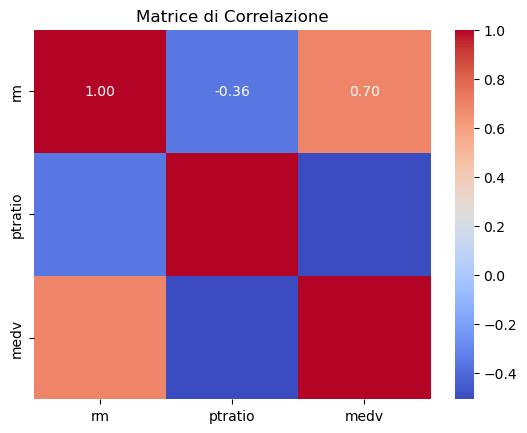

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assumi che `correlazioni` sia la matrice di correlazione che hai già calcolato
sns.heatmap(correlazioni, annot=True, fmt=".2f", cmap='coolwarm')

plt.title('Matrice di Correlazione')
plt.show()


In [204]:
import humanize as hu
prezzo_medio = bos.groupby(["chas"])["medv"].mean().to_frame() * 1000 # le case che NON costeggiano il fiume hanno un valore medio più alto rispetto alle altre
prezzo_medio_arrotondato = prezzo_medio.round().astype(int)
prezzo_medio_arrotondato

,medv
chas,
0,22094
1,28440


C:\Users\User\AppData\Local\Temp\ipykernel_19432\3817464784.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_values = bos.groupby('crim_category')['medv'].mean().reset_index()


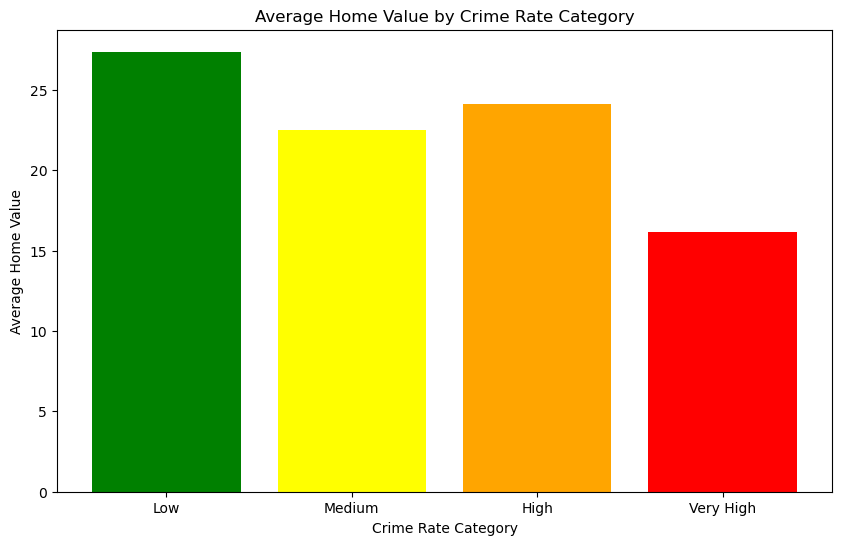

In [19]:
bos['crim_category'] = pd.qcut(bos['crim'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calcoliamo ora il valore medio delle abitazioni per categoria di criminalità
average_values = bos.groupby('crim_category')['medv'].mean().reset_index()

# Creiamo il grafico
plt.figure(figsize=(10, 6))
plt.bar(average_values['crim_category'], average_values['medv'], color=['green', 'yellow', 'orange', 'red'])
plt.title('Average Home Value by Crime Rate Category')
plt.xlabel('Crime Rate Category')
plt.ylabel('Average Home Value')
plt.show()

In [16]:
pt = bos.groupby(["ptratio"])["rm"].mean().to_frame() #più il rapporto allunni/insegnanti è alto e minore sarà il numero delle stanze
plt.figure(figsize=(10, 6))
plt.plot(pt['ptratio'], pt['rm'], marker='o', linestyle='-', color='skyblue')
plt.title('Average Number of Rooms vs. Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Average Number of Rooms')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

KeyError: 'ptratio'

<Figure size 1000x600 with 0 Axes>

In [176]:
bos.groupby(["rad"])["age"].mean().to_frame() #

,age
rad,
1,45.025000
2,64.770833
3,49.310526
4,60.841818
5,69.223478
6,60.142308
7,40.141176
8,67.350000
24,89.805303


In [21]:
employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105], 'name': ['Alice', 'Bob', 'Charlie', 'David', 'Emma'], 'department_id': [1, 2, 1, 2, 3] })
employees_df

,employee_id,name,department_id
0,101,Alice,1
1,102,Bob,2
2,103,Charlie,1
3,104,David,2
4,105,Emma,3


In [22]:
departments_df = pd.DataFrame({ 'department_id': [1, 2, 3], 'department_name': ['HR', 'IT', 'Finance'], 'location': ['New York', 'San Francisco', 'Chicago'] })
departments_df

,department_id,department_name,location
0,1,HR,New York
1,2,IT,San Francisco
2,3,Finance,Chicago


In [24]:
merged = pd.merge(left=employees_df, right=departments_df, on="department_id", how = "inner") # uniti i df con il metodo merge
merged

,employee_id,name,department_id,department_name,location
0,101,Alice,1,HR,New York
1,103,Charlie,1,HR,New York
2,102,Bob,2,IT,San Francisco
3,104,David,2,IT,San Francisco
4,105,Emma,3,Finance,Chicago


In [25]:
employees_df.set_index("department_id", inplace = True) #unito con il metodo join
departments_df.set_index("department_id", inplace = True)

In [20]:
joined = employees_df.join(departments_df)
joined

,employee_id,name,department_name,location
department_id,,,,
1,101,Alice,HR,New York
1,103,Charlie,HR,New York
2,102,Bob,IT,San Francisco
2,104,David,IT,San Francisco
3,105,Emma,Finance,Chicago


In [27]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
dotenv.load_dotenv(override=True)
username=os.getenv("username")
password=os.getenv("password")
host=os.getenv("host")
dbname=os.getenv("dbname")
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
query_employee = """SELECT * FROM dimemployee
        """
df_employee = pd.read_sql(query_employee, db_engine)
query_territory = """SELECT * FROM dimemployeesalesterritory
        """
df_territory = pd.read_sql(query_territory, db_engine)

query_salesterritory = """SELECT * FROM dimsalesterritory
        """
df_salesterritory = pd.read_sql(query_salesterritory, db_engine)

db_engine.dispose()

In [28]:
df_employee.head()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,Gender,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position
0,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,M,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
1,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,M,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
2,3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,M,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
3,4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
4,5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None


In [29]:
df_territory.head()

,EmployeeKey,SalesTerritoryKey
0,272,1
1,277,1
2,286,1
3,289,1
4,293,1


In [44]:
merged_emp = pd.merge(left=df_employee, right=df_territory, on="EmployeeKey", how = "inner") # uniti i df con il metodo merge
merged_emp.shape

(39, 29)

In [45]:
df_salesterritory

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,4,4,Southwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,5,5,Southeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
5,6,6,Canada,Canada,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
6,7,7,France,France,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
7,8,8,Germany,Germany,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
8,9,9,Australia,Australia,Pacific,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
9,10,10,United Kingdom,United Kingdom,Europe,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [45]:
merged_ter = pd.merge(left=merged_emp, right=df_salesterritory, on="SalesTerritoryKey", how = "inner") # uniti i df con il metodo merge
merged_ter

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,286,272.0,61161660,502097814.0,Pamela,Ansman-Wolfe,O,0,Sales Representative,2010-12-29,...,1,Sales,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Sales Representative,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,289,272.0,987554265,502097814.0,David,Campbell,R,0,Sales Representative,2010-12-29,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
5,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
6,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
7,281,272.0,841560125,502097814.0,Michael,Blythe,G,0,Sales Representative,2010-12-29,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
8,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
9,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [46]:
country_employee = merged_ter.groupby(["SalesTerritoryCountry"])["EmployeeKey"].count().to_frame()
country_employee

,EmployeeKey
SalesTerritoryCountry,
Australia,3
Canada,4
France,4
Germany,3
United Kingdom,3
United States,22


In [47]:
region_employee = merged_ter.groupby(["SalesTerritoryRegion"])["EmployeeKey"].count().to_frame()
region_employee

,EmployeeKey
SalesTerritoryRegion,
Australia,3
Canada,4
Central,5
France,4
Germany,3
Northeast,3
Northwest,5
Southeast,4
Southwest,5


In [48]:
country_br = merged_ter.groupby(["SalesTerritoryCountry"])["BaseRate"].mean().to_frame()
country_br

,BaseRate
SalesTerritoryCountry,
Australia,47.764433
Canada,41.592550
France,41.592550
Germany,47.764433
United Kingdom,47.764433
United States,39.909309
